In [1]:
from matplotlib import pyplot as plt
from sklearn import datasets,metrics
from sklearn.neighbors import KNeighborsClassifier
from keras.datasets import mnist

Using TensorFlow backend.


11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


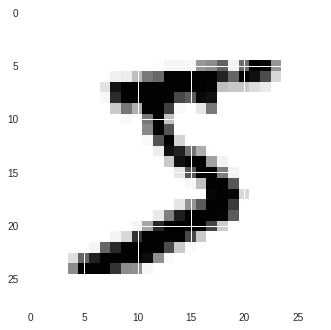

In [2]:
(X_data, Y_data),(x_val,Y_val) = mnist.load_data()
print(X_data.shape)
plt.imshow(X_data[0])
plt.show()

In [3]:
#load data for the KNN
digits = datasets.load_digits()
#print tge digits data at the same point
print(digits.data[1])
#dataset is the numerical representtion of the images in MNIST

[ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
  3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
 16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
  0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]


In [0]:
#because the digits is such a large dataset we are going to make it smaller 
training_volume = 1000
test_volume = 500

In [5]:
#lets zip together the digits and the labels
images_and_labels = list(zip(digits.images,digits.target))
print(images_and_labels[10])

(array([[ 0.,  0.,  1.,  9., 15., 11.,  0.,  0.],
       [ 0.,  0., 11., 16.,  8., 14.,  6.,  0.],
       [ 0.,  2., 16., 10.,  0.,  9.,  9.,  0.],
       [ 0.,  1., 16.,  4.,  0.,  8.,  8.,  0.],
       [ 0.,  4., 16.,  4.,  0.,  8.,  8.,  0.],
       [ 0.,  1., 16.,  5.,  1., 11.,  3.,  0.],
       [ 0.,  0., 12., 12., 10., 10.,  0.,  0.],
       [ 0.,  0.,  1., 10., 13.,  3.,  0.,  0.]]), 0)


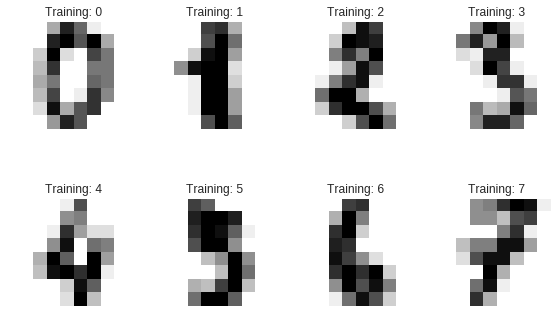

In [6]:
#iiterate over the first 8 digits in order in the list and print them
for index,(image,label) in enumerate(images_and_labels[:8]):
  plt.subplot(2,4,index+1)
  plt.axis('off')
  plt.tight_layout()
  plt.imshow(image,cmap=plt.cm.gray_r)
  plt.title('Training: %i' %label)

In [11]:
#you want to apply a classifier to the data but first you need to flatten the images to their original shape
print(digits.images.shape)

n_samples = len(digits.images)
data = digits.images.reshape(n_samples, -1)
print(data.shape)
print(data[0])

(1797, 8, 8)
(1797, 64)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [21]:
#nw we can create the classifier(KNN classifier), fit it to our training data
classifier= KNeighborsClassifier(algorithm = 'brute', metric = 'minkowski', n_neighbors=1, p=2)
#digits.target is an array of 0->9 values repeated in a sequence
classifier.fit(data[:training_volume], digits.target[:training_volume])

                  

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [22]:
#gathe rhte expected laels from the data set
expected = digits.target[training_volume: (training_volume+test_volume)]

#predict the labels using the model
predicted=classifier.predict(data[training_volume: (training_volume+test_volume)])
print(len(predicted)) #amount predicted

500


In [23]:
#Use two arrays to calculate accuracy using average
num_correct=0
for i in range(0,len(expected)):
  if expected[i] == predicted[i]:
    num_correct +=1
   
print("Accuracy: \n%s" % str(float(num_correct / float(len(expected)))))

Accuracy: 
0.976


In [27]:
#skikit learn actually comes iwth built in functions for evaluating models 
print("Accuracy:\n %s" %metrics.accuracy_score(expected,predicted))
print("Classification report for classifier %s \n%s \n" % (classifier,metrics.classification_report(expected,predicted)))
print("confusion matrix: \n%s \n" % metrics.confusion_matrix(expected, predicted))

Accuracy:
 0.976
Classification report for classifier KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform') 
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        52
          1       0.98      0.94      0.96        49
          2       0.98      0.96      0.97        50
          3       0.91      1.00      0.95        49
          4       1.00      0.98      0.99        50
          5       0.98      0.98      0.98        52
          6       0.98      1.00      0.99        50
          7       1.00      1.00      1.00        50
          8       0.96      0.96      0.96        48
          9       0.98      0.94      0.96        50

avg / total       0.98      0.98      0.98       500
 

confusion matrix: 
[[52  0  0  0  0  0  0  0  0  0]
 [ 0 46  1  0  0  0  0  0  2  0]
 [ 0  0 48  2  0  0  0  0  0  0]
 [ 0  0  0 49  0  0  